# 区间可行性分布趋势与结构展示


本实验 Notebook 按分布类型展示参数变化下的价格区间可行性结构。  
每个分布模块包含：
1. 参数扫描趋势图（Feasibility Trend）
2. 典型参数下的热力图展示
3. 每个热图后的结构分析输出


In [1]:

import numpy as np
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from algorithms.market import Market
from experiments.feasibility_grid import generate_feasibility_grid
from utils.market_generator import MarketGenerator
from utils.feasibility_analysis import analyze_feasibility_matrix
from utils.visualization import plot_feasibility_heatmap, plot_feasibility_trend
import matplotlib.pyplot as plt

# 设置全局字体为支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题


## 🔹 分布一：截断正态分布 (μ=5, σ ∈ [0.5, 3.0])

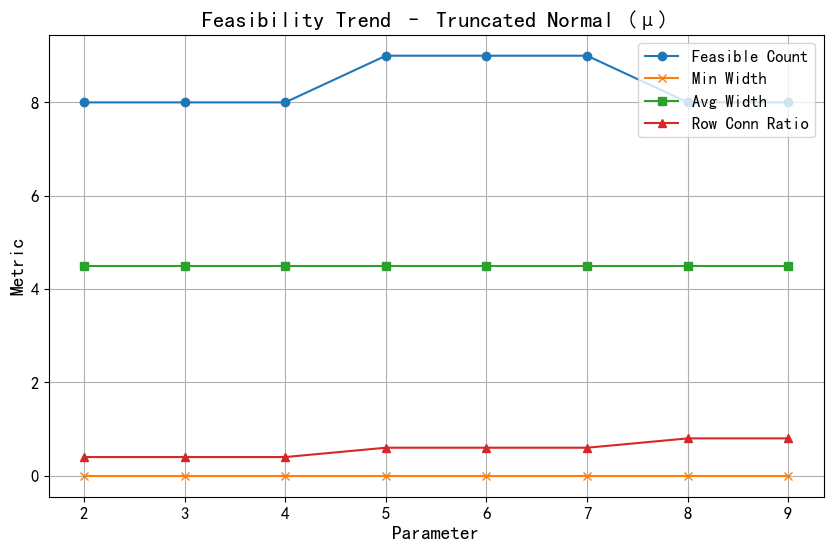

In [2]:
# 测试目标：分析均值 mu 移动对机制空间的影响（模拟市场结构左/右偏）
mus = np.linspace(2,9,8)  
results = []

for mu in mus:
    values, masses = MarketGenerator.truncated_normal(mu=mu, sigma=1.5, n=5, low=1, high=10)
    market = Market(values, masses)

    matrix = generate_feasibility_grid(market)
    metrics = analyze_feasibility_matrix(values, matrix, verbose=False)

    results.append(metrics)

plot_feasibility_trend(mus, results, title="Feasibility Trend – Truncated Normal (μ)", save_path="results/normal_trend.svg")


▶️ 热图展示：μ = 2.0
✅ 可行区间数量: 8
📏 最小宽度: 0.000, 平均宽度: 4.500
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.40

▶️ 热图展示：μ = 5.0
✅ 可行区间数量: 9
📏 最小宽度: 0.000, 平均宽度: 4.500
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.60

▶️ 热图展示：μ = 9.0
✅ 可行区间数量: 8
📏 最小宽度: 0.000, 平均宽度: 4.500
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.80


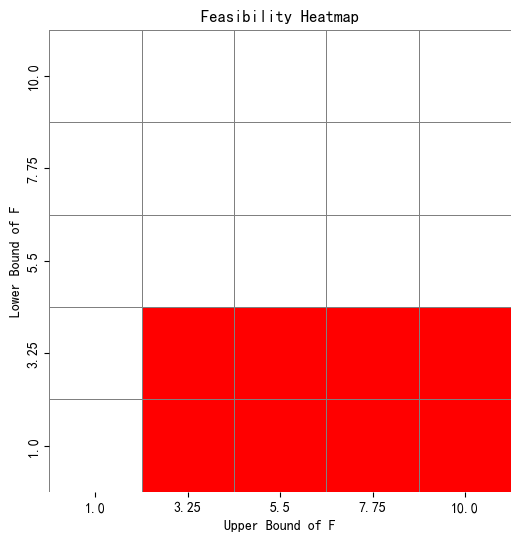

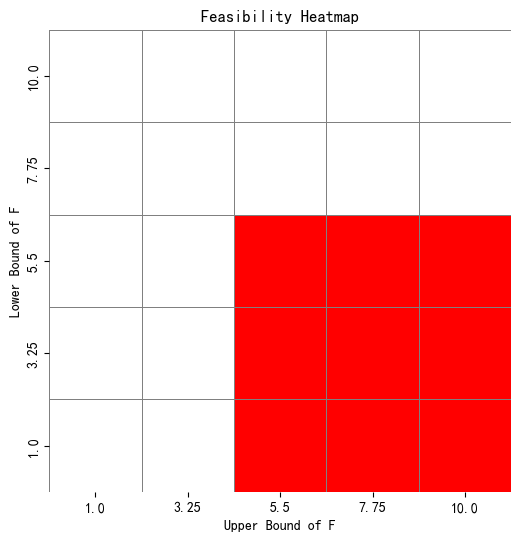

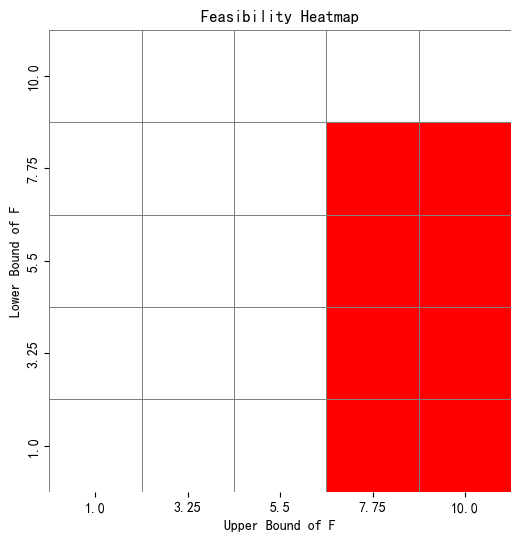

In [3]:
for mu in [2.0, 5.0, 9.0]:
    print(f"\n▶️ 热图展示：μ = {mu}")
    values, masses = MarketGenerator.truncated_normal(mu=mu, sigma=1.5, n=5)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    plot_feasibility_heatmap(values, matrix)
    analyze_feasibility_matrix(values, matrix)



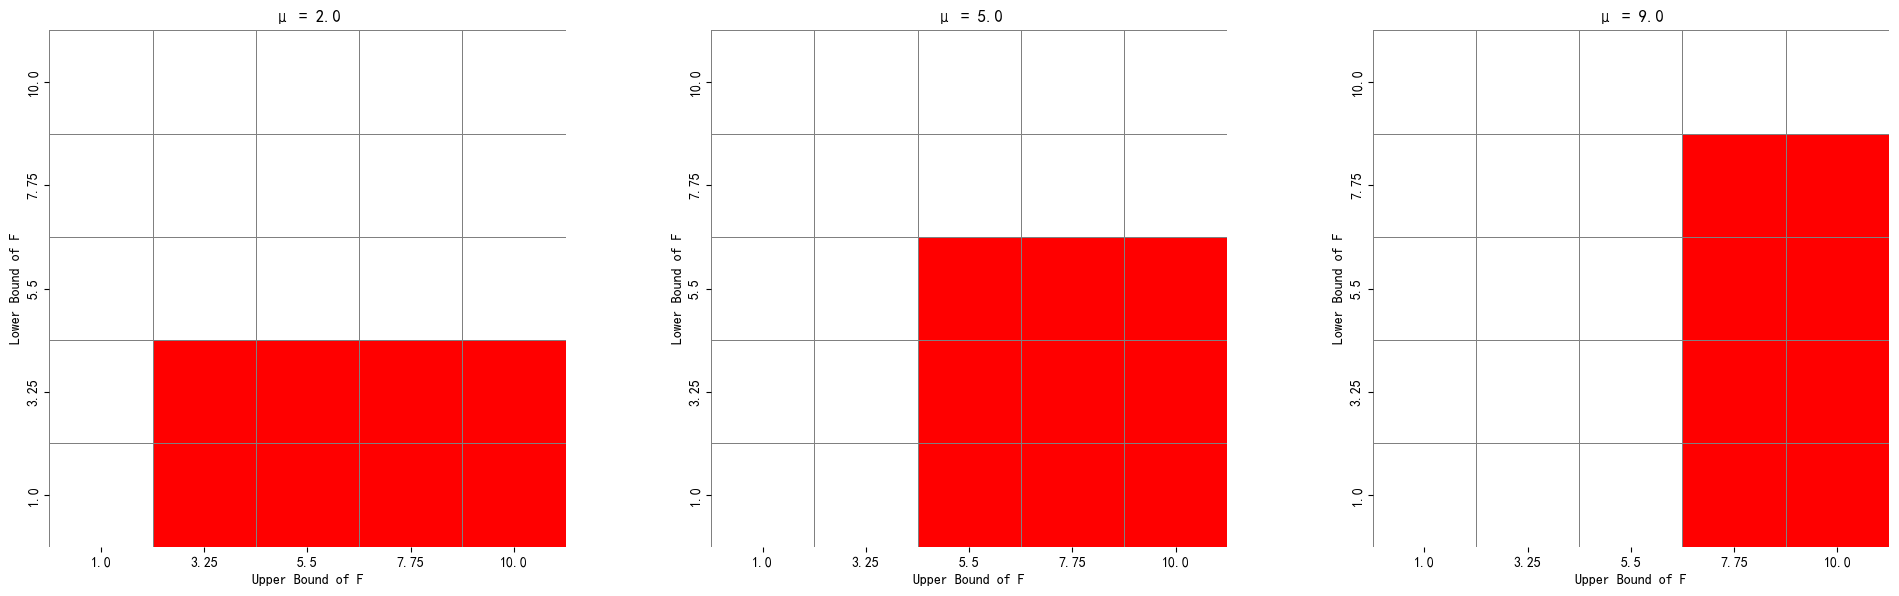

In [7]:
# import matplotlib.pyplot as plt
# # 创建一个含有3个子图的图形
# fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# for i, mu in enumerate([2.0, 5.0, 9.0]):
#     # 使用MarketGenerator.truncated_normal方法
#     values, masses = MarketGenerator.truncated_normal(mu=mu, sigma=1.5, n=5)
#     market = Market(values, masses)
#     matrix = generate_feasibility_grid(market)
#     # 调用函数绘制热图，传入axes[i]和正确的标题
#     plot_feasibility_heatmap(values, matrix, title=f"μ = {mu}", ax=axes[i])

# plt.tight_layout()
# plt.show()

import matplotlib.pyplot as plt
import os

fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 更大图像更清晰

for i, mu in enumerate([2.0, 5.0, 9.0]):
    values, masses = MarketGenerator.truncated_normal(mu=mu, sigma=1.5, n=5)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    plot_feasibility_heatmap(values, matrix, title=f"μ = {mu}", ax=axes[i])

plt.tight_layout()

# ✅ 保存高清版本（建议用 .pdf 或 .png）
os.makedirs("results", exist_ok=True)
fig.savefig("results/normal_heatmap.svg", bbox_inches='tight')  # 矢量图
# fig.savefig("results/feasibility_comparison.png", dpi=300, bbox_inches='tight')  # 或高清PNG

plt.show()  # 如果还想在屏幕上看一遍



## 🔹 分布二：幂律分布 (α ∈ [1.5, 3.0])

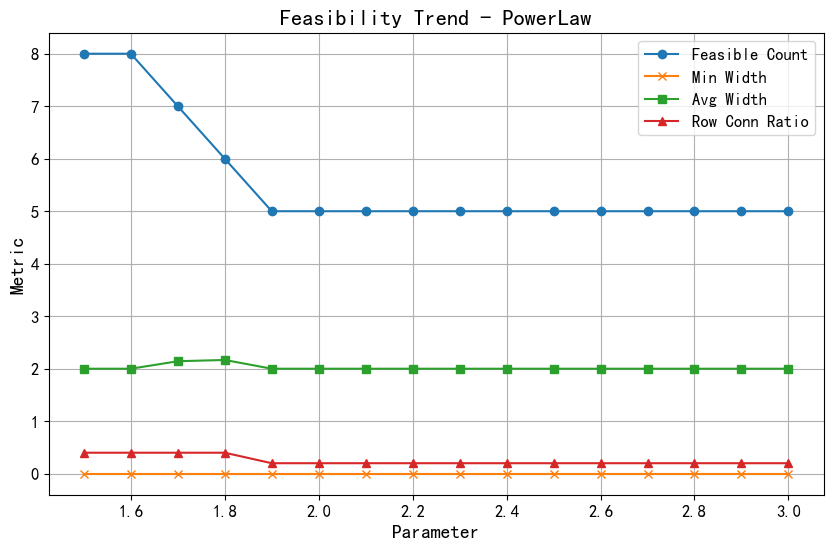

In [9]:

alphas = np.linspace(1.5, 3.0, 16)
results = []

for alpha in alphas:
    values, masses = MarketGenerator.powerlaw(alpha=alpha, n=5)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    metrics = analyze_feasibility_matrix(values, matrix, verbose=False)
    results.append(metrics)

plot_feasibility_trend(alphas, results, title="Feasibility Trend - PowerLaw", save_path="results/powerlaw_trend.svg")



▶️ 热图展示：α = 1.5
✅ 可行区间数量: 8
📏 最小宽度: 0.000, 平均宽度: 2.000
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.40

▶️ 热图展示：α = 1.8
✅ 可行区间数量: 6
📏 最小宽度: 0.000, 平均宽度: 2.167
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.40

▶️ 热图展示：α = 2.2
✅ 可行区间数量: 5
📏 最小宽度: 0.000, 平均宽度: 2.000
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.20


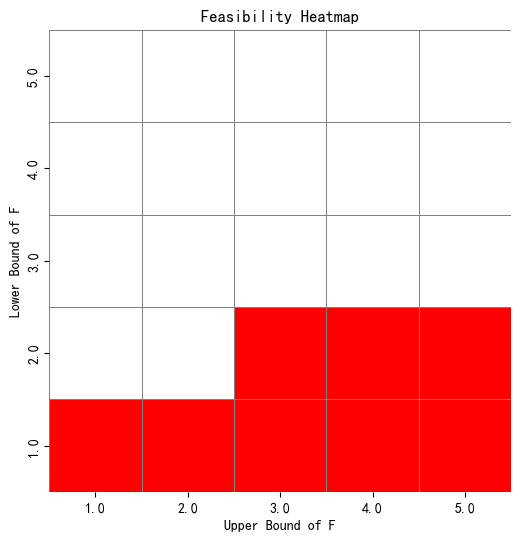

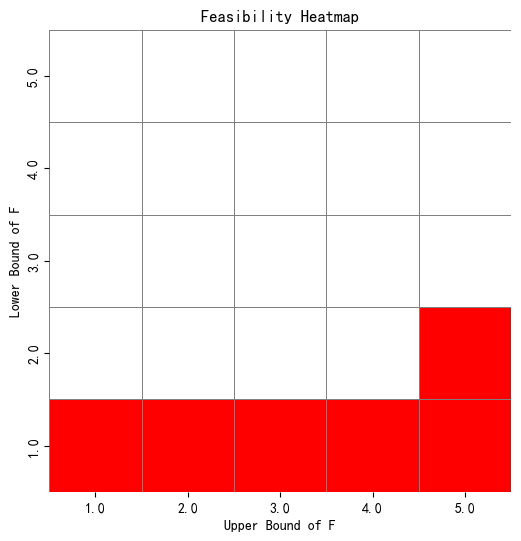

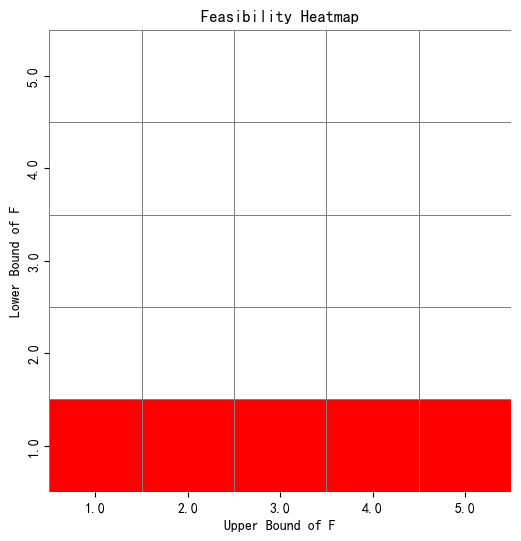

In [10]:

for alpha in [1.5, 1.8, 2.2]:
    print(f"\n▶️ 热图展示：α = {alpha}")
    values, masses = MarketGenerator.powerlaw(alpha=alpha, n=5)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    plot_feasibility_heatmap(values, matrix)
    analyze_feasibility_matrix(values, matrix)


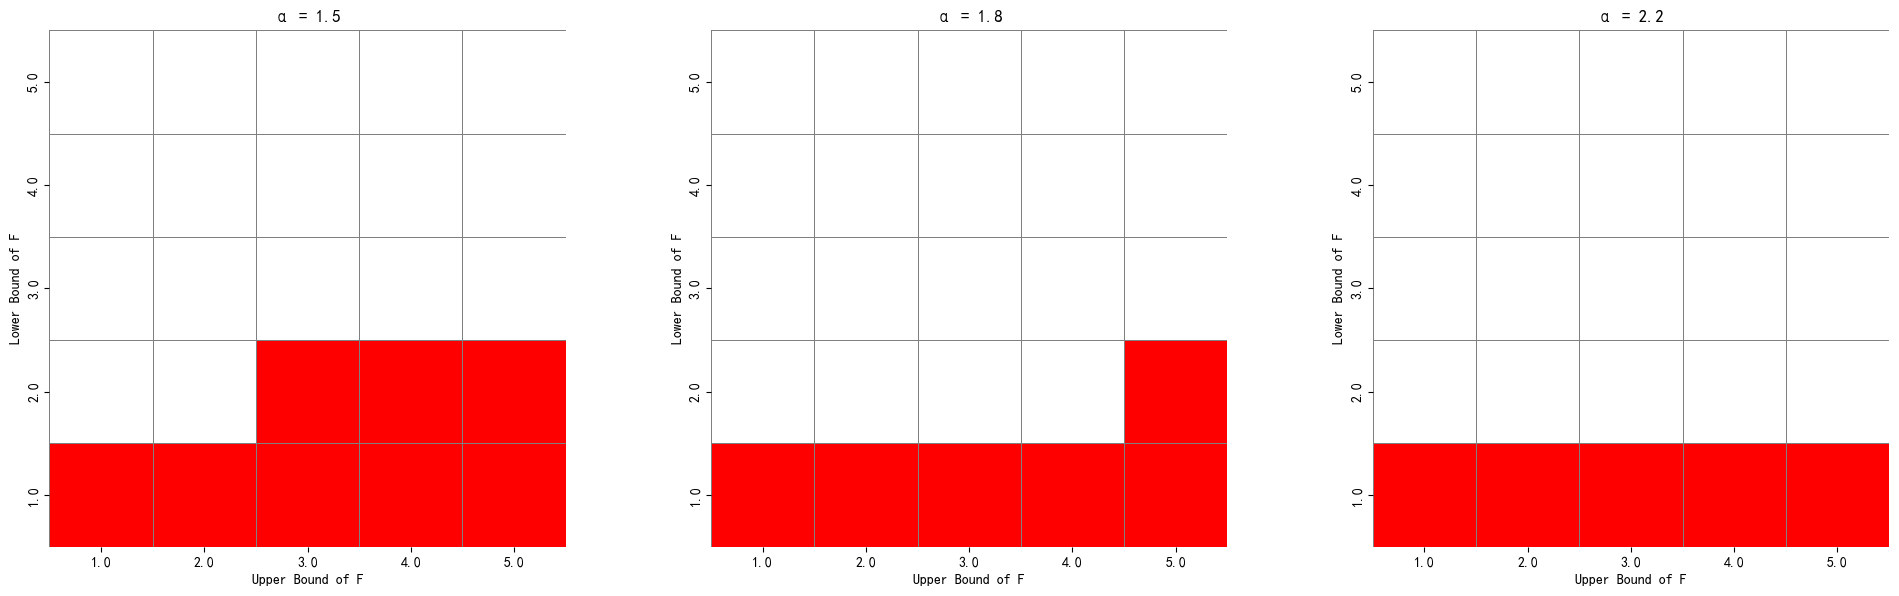

In [11]:
import matplotlib.pyplot as plt
# 创建一个含有3个子图的图形
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, alpha in enumerate([1.5, 1.8, 2.2]):
    # 使用MarketGenerator.powerlaw方法
    values, masses = MarketGenerator.powerlaw(alpha=alpha, n=5)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    # 调用函数绘制热图，传入axes[i]和正确的标题
    plot_feasibility_heatmap(values, matrix, title=f"α = {alpha}", ax=axes[i])

plt.tight_layout()
os.makedirs("results", exist_ok=True)
fig.savefig("results/powerlaw_heatmap.svg", bbox_inches='tight')  # 矢量图
plt.show()

## 🔹 分布三：二项型分布 (p ∈ [0.1, 0.9])

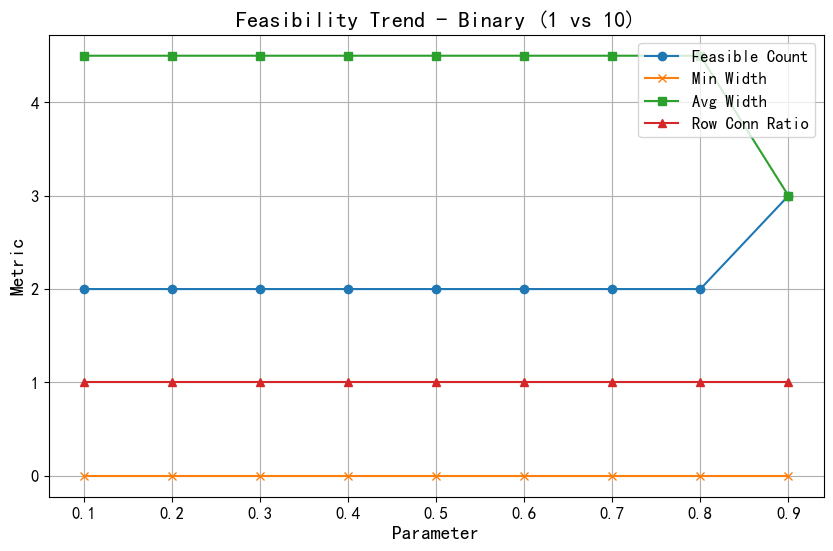

In [12]:

ps = np.linspace(0.1, 0.9, 9)
results = []

for p in ps:
    values, masses = MarketGenerator.binary(p=p, low=1, high=10)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    metrics = analyze_feasibility_matrix(values, matrix, verbose=False)
    results.append(metrics)

plot_feasibility_trend(ps, results, title="Feasibility Trend - Binary (1 vs 10)", save_path="results/binary_trend.svg")



▶️ 热图展示：p = 0.1
✅ 可行区间数量: 2
📏 最小宽度: 0.000, 平均宽度: 4.500
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 1.00

▶️ 热图展示：p = 0.5
✅ 可行区间数量: 2
📏 最小宽度: 0.000, 平均宽度: 4.500
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 1.00

▶️ 热图展示：p = 0.9
✅ 可行区间数量: 3
📏 最小宽度: 0.000, 平均宽度: 3.000
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 1.00


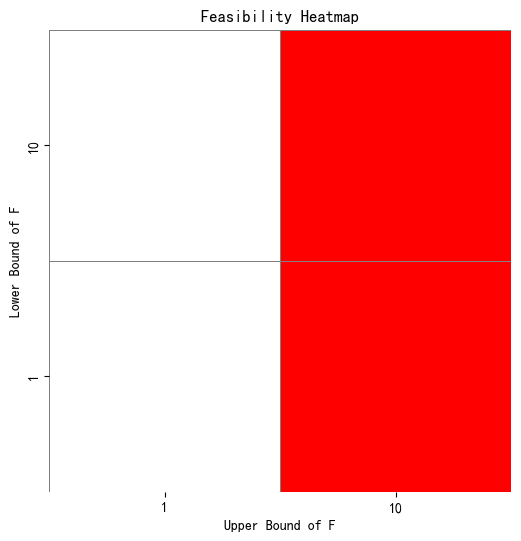

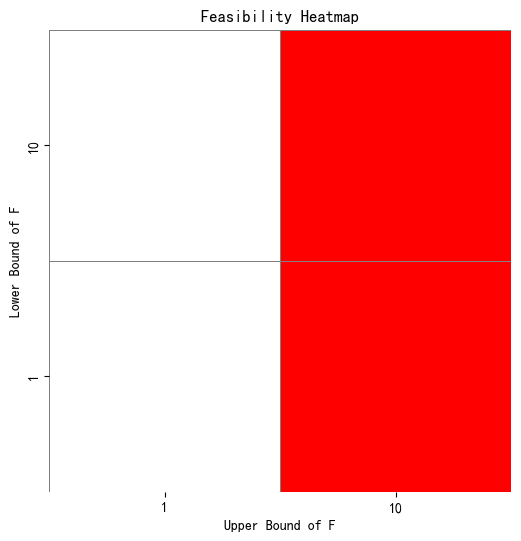

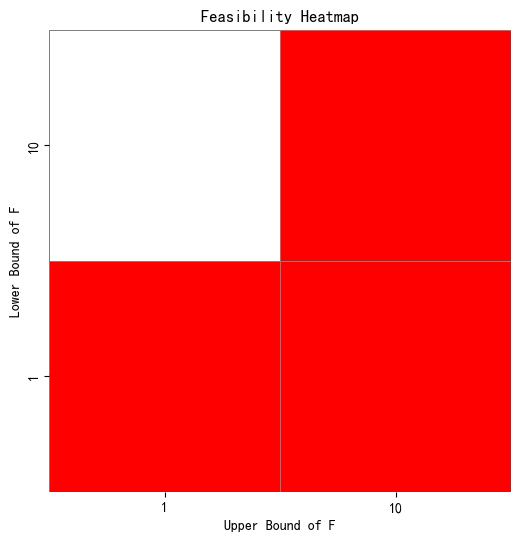

In [6]:

for p in [0.1, 0.5, 0.9]:
    print(f"\n▶️ 热图展示：p = {p}")
    values, masses = MarketGenerator.binary(p=p, low=1, high=10)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    plot_feasibility_heatmap(values, matrix)
    analyze_feasibility_matrix(values, matrix)


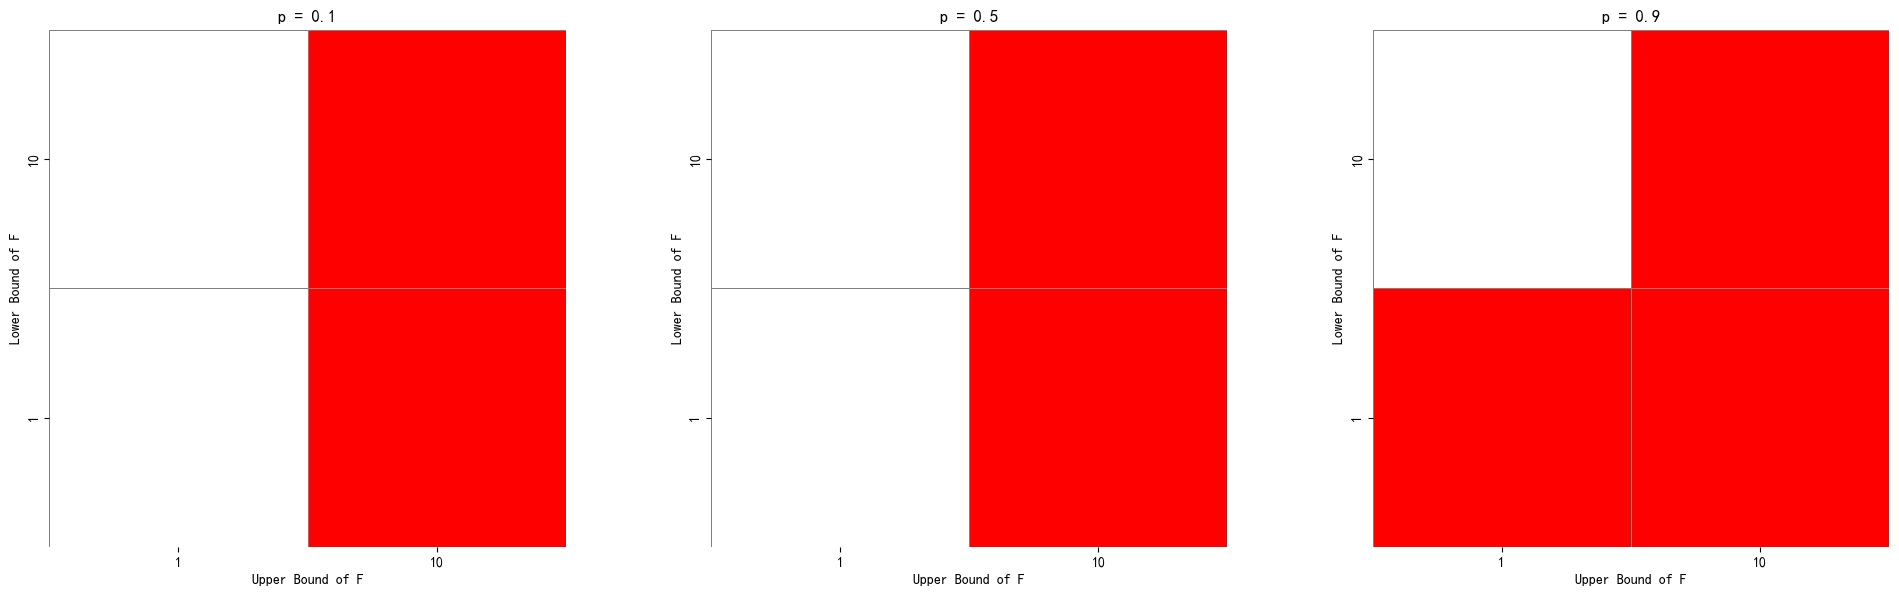

In [13]:
import matplotlib.pyplot as plt
# 创建一个含有3个子图的图形
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, p in enumerate([0.1, 0.5, 0.9]):
    # 使用MarketGenerator.binary而不是uniform
    values, masses = MarketGenerator.binary(p=p, low=1, high=10)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    # 调用函数绘制热图，传入axes[i]和正确的标题
    plot_feasibility_heatmap(values, matrix, title=f"p = {p}", ax=axes[i])

plt.tight_layout()
os.makedirs("results", exist_ok=True)
fig.savefig("results/binary_heatmap.svg", bbox_inches='tight')  # 矢量图
plt.show()

## 🔹 分布四：双峰分布 (权重 ∈ [0.2, 0.8])

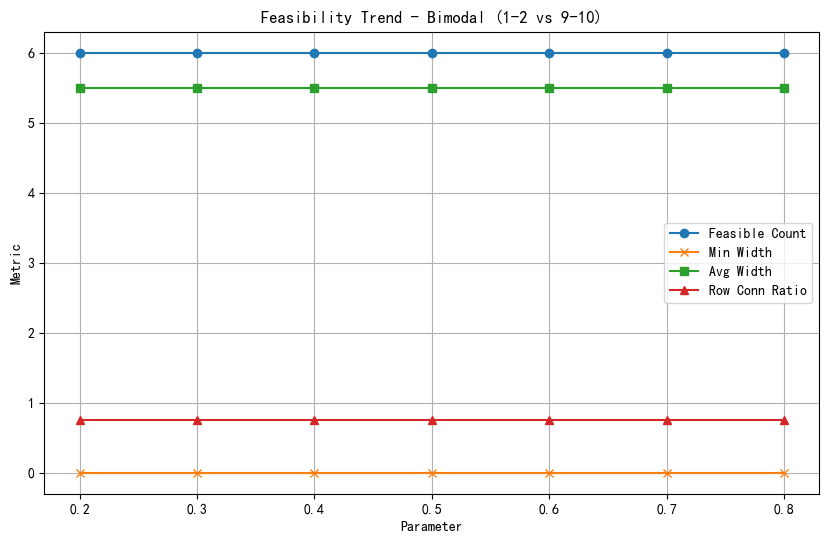

In [19]:

weights = np.linspace(0.2, 0.8, 7)
results = []

for w in weights:
    values, masses = MarketGenerator.bimodal([1, 2], [9, 10], weight=w)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    metrics = analyze_feasibility_matrix(values, matrix, verbose=False)
    results.append(metrics)

plot_feasibility_trend(weights, results, title="Feasibility Trend - Bimodal (1-2 vs 9-10)", save_path="results/binary_trend.svg")


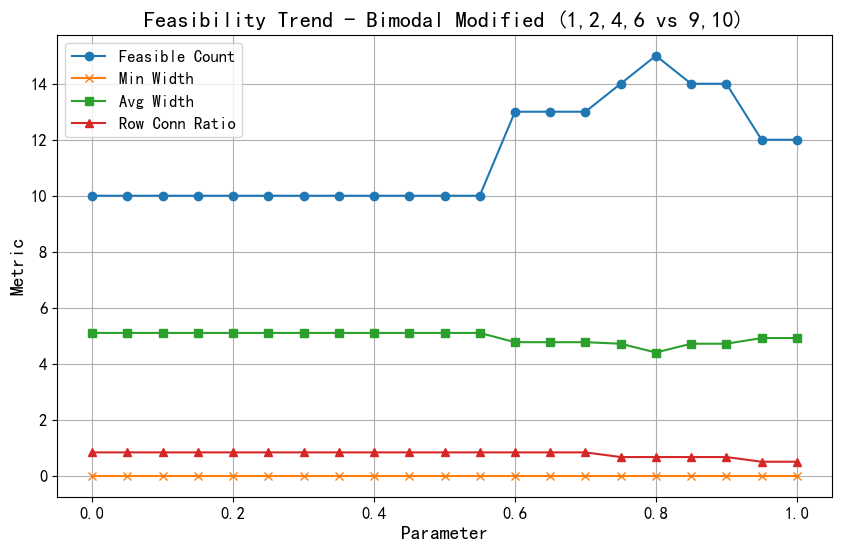

In [14]:

def run_modified_bimodal_experiment():
    """
    在原双峰实验的基础上做如下修改：
    1) 将权重采样扩展至 [0,1] 区间，更细化步骤。
    2) 在 bimodal 分布里插入一些中间值 (如 4, 6)。
    3) 查看可行性判定是否随权重有显著变化。
    """

    # 1. 让 weights 更密集，从 0 到 1，步长=0.05
    weights = np.linspace(0.0, 1.0, 21)
    results = []

    for w in weights:
        # 2. 给 bimodal 生成时多加两个中间值 4, 6
        #    即“低峰”含 [1,2,4,6], “高峰”含 [9,10]
        values, masses = MarketGenerator.bimodal([1,2,4,6],[9,10],weight=w)

        # 3. 构建 market 并生成可行性矩阵
        market = Market(values, masses)
        matrix = generate_feasibility_grid(market)
        
        # 4. 分析可行性矩阵
        metrics = analyze_feasibility_matrix(values, matrix, verbose=False)
        results.append(metrics)

    # 5. 绘图查看随 w 变化的可行性曲线
    plot_feasibility_trend(weights, results, 
        title="Feasibility Trend - Bimodal Modified (1,2,4,6 vs 9,10)", save_path="results/bimodal_trend.svg")

    # 如果想限制分割段数（例如仅允许2段），
    # 可以在 generate_feasibility_grid 或 analyze_feasibility_matrix 中加对应限制逻辑
    # 或另写一个 generate_feasibility_grid(..., max_segments=2).


run_modified_bimodal_experiment()



▶️ 热图展示：双峰权重 = 0.4
✅ 可行区间数量: 10
📏 最小宽度: 0.000, 平均宽度: 5.100
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.83

▶️ 热图展示：双峰权重 = 0.6
✅ 可行区间数量: 13
📏 最小宽度: 0.000, 平均宽度: 4.769
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.83

▶️ 热图展示：双峰权重 = 0.8
✅ 可行区间数量: 15
📏 最小宽度: 0.000, 平均宽度: 4.400
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.67


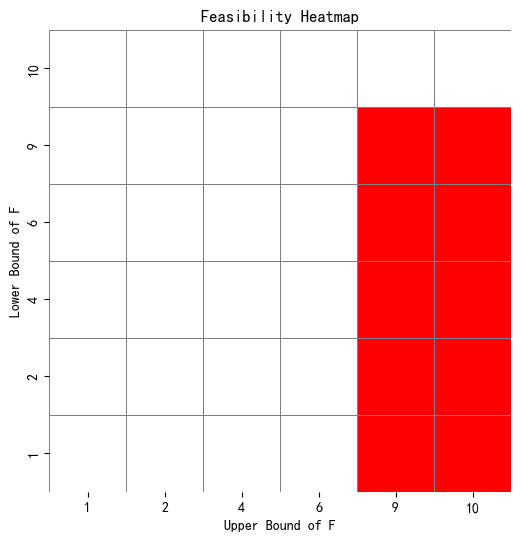

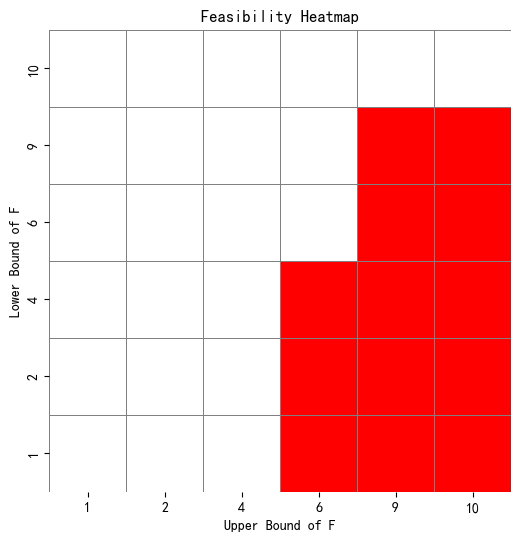

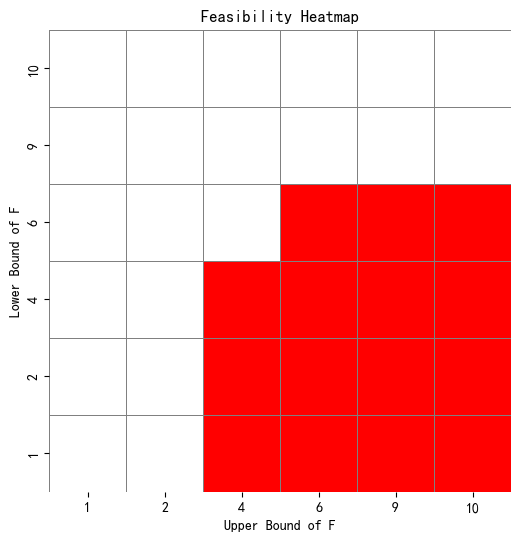

In [28]:

for w in [0.4, 0.6, 0.8]:
    print(f"\n▶️ 热图展示：双峰权重 = {w}")
    values, masses = MarketGenerator.bimodal([1,2,4,6], [9, 10], weight=w)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    plot_feasibility_heatmap(values, matrix)
    analyze_feasibility_matrix(values, matrix)


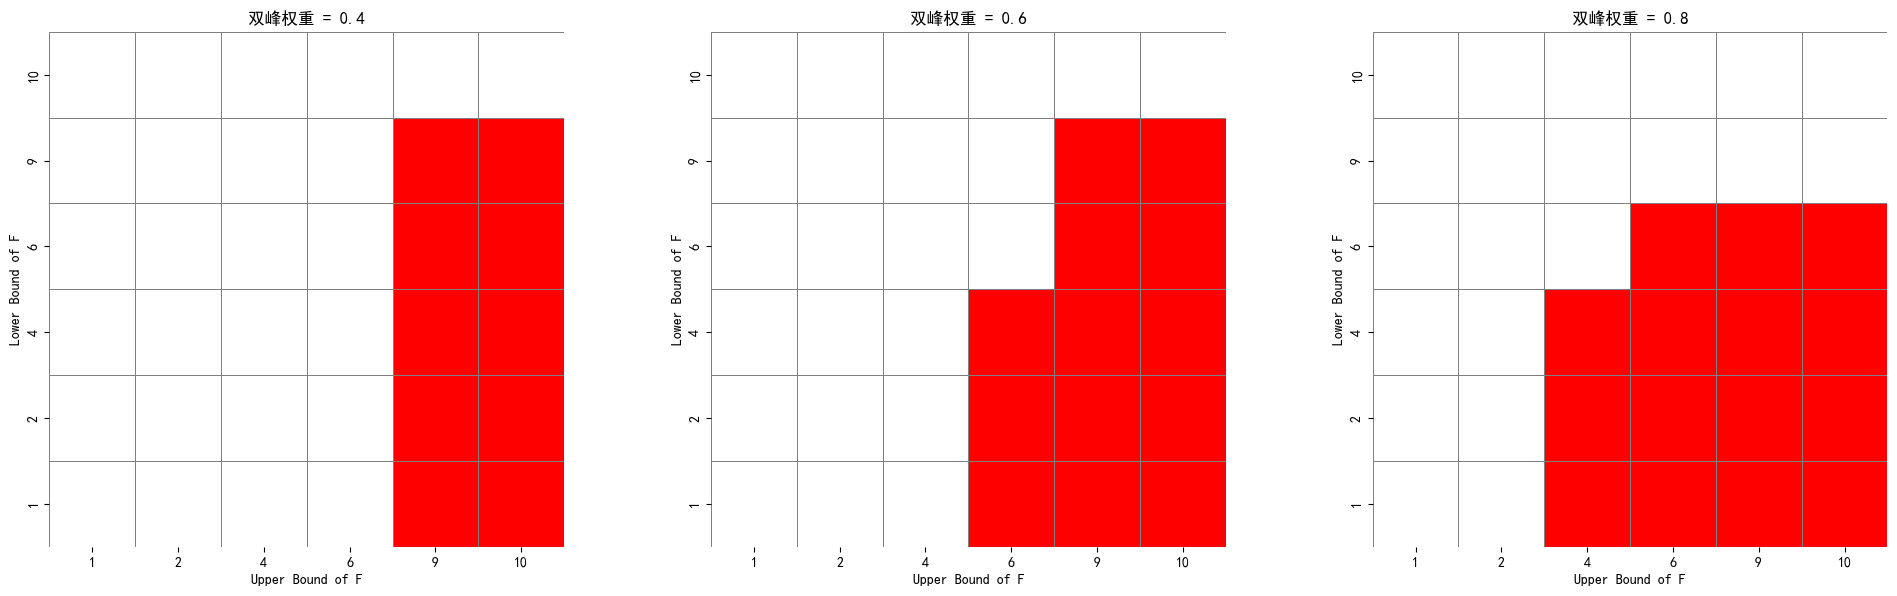

In [15]:
import matplotlib.pyplot as plt
# 创建一个含有3个子图的图形
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, w in enumerate([0.4, 0.6, 0.8]):
    # 使用MarketGenerator.bimodal方法
    values, masses = MarketGenerator.bimodal([1,2,4,6], [9, 10], weight=w)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    # 调用函数绘制热图，传入axes[i]和正确的标题
    plot_feasibility_heatmap(values, matrix, title=f"双峰权重 = {w}", ax=axes[i])

plt.tight_layout()
os.makedirs("results", exist_ok=True)
fig.savefig("results/bimodal_heatmap.svg", bbox_inches='tight')  # 矢量图
plt.show()

## 🔹 分布五：几何分布 (q ∈ [0.2, 0.8])

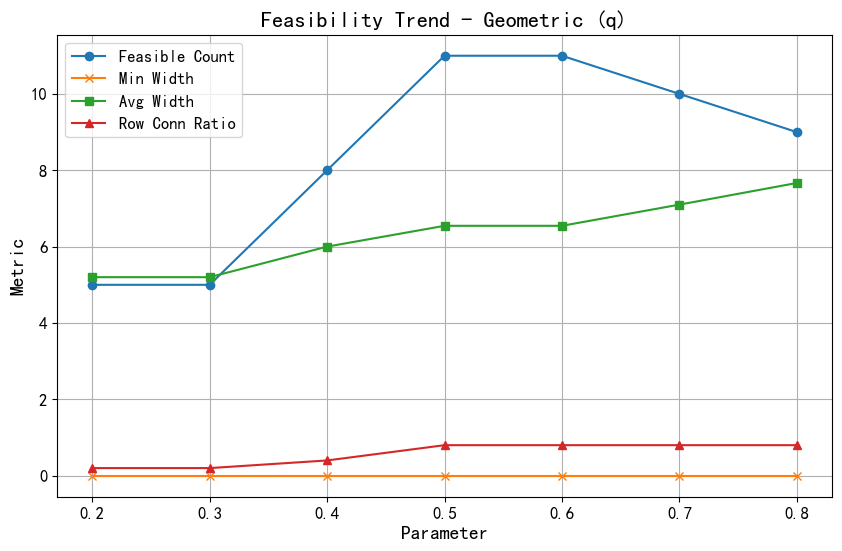

In [16]:

qs = np.linspace(0.2, 0.8, 7)
results = []

for q in qs:
    values, masses = MarketGenerator.geometric(q=q, n=5)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    metrics = analyze_feasibility_matrix(values, matrix, verbose=False)
    results.append(metrics)

plot_feasibility_trend(qs, results, title="Feasibility Trend - Geometric (q)", save_path="results/geometric_trend.svg")



▶️ 热图展示：q = 0.2
✅ 可行区间数量: 5
📏 最小宽度: 0.000, 平均宽度: 5.200
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.20

▶️ 热图展示：q = 0.5
✅ 可行区间数量: 11
📏 最小宽度: 0.000, 平均宽度: 6.545
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.80

▶️ 热图展示：q = 0.8
✅ 可行区间数量: 9
📏 最小宽度: 0.000, 平均宽度: 7.667
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.80


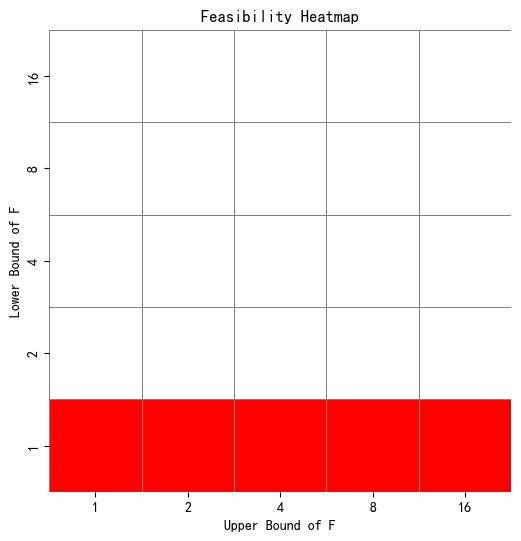

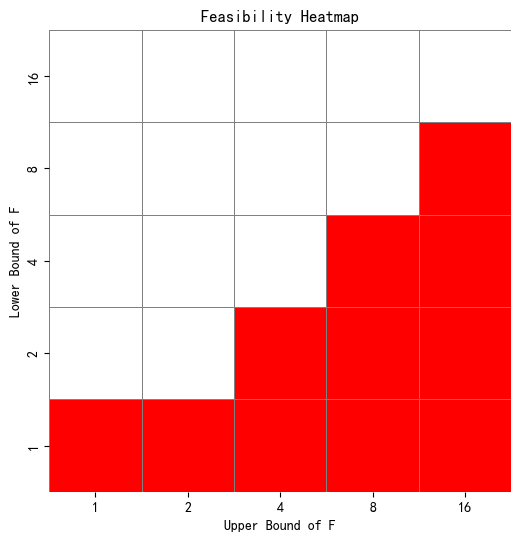

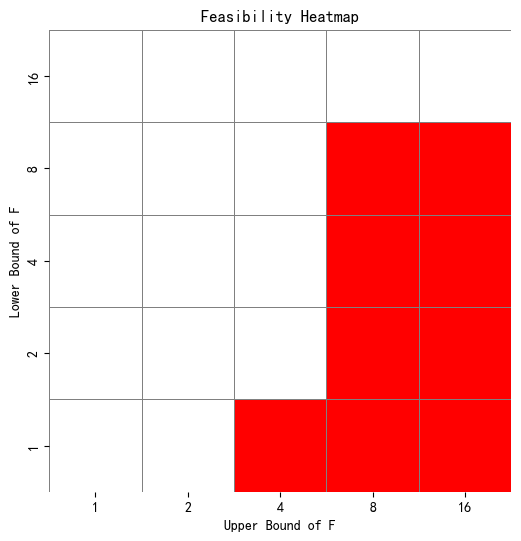

In [9]:

for q in [0.2, 0.5, 0.8]:
    print(f"\n▶️ 热图展示：q = {q}")
    values, masses = MarketGenerator.geometric(q=q, n=5)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    plot_feasibility_heatmap(values, matrix)
    analyze_feasibility_matrix(values, matrix)


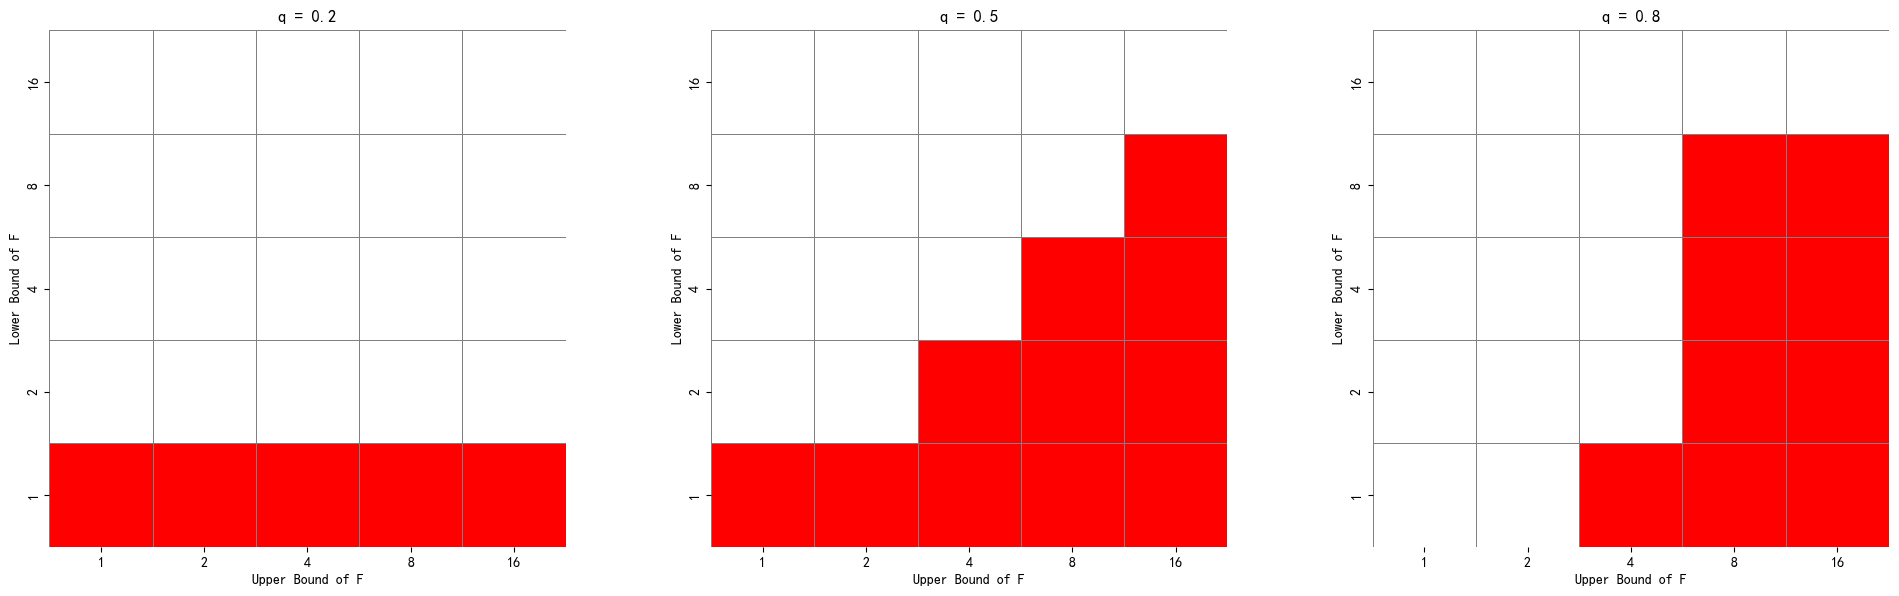

In [17]:
import matplotlib.pyplot as plt
# 创建一个含有3个子图的图形
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, q in enumerate([0.2, 0.5, 0.8]):
    # 使用MarketGenerator.geometric方法
    values, masses = MarketGenerator.geometric(q=q, n=5)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    # 调用函数绘制热图，传入axes[i]和正确的标题
    plot_feasibility_heatmap(values, matrix, title=f"q = {q}", ax=axes[i])

plt.tight_layout()
os.makedirs("results", exist_ok=True)
fig.savefig("results/geometric_heatmap.svg", bbox_inches='tight')  # 矢量图
plt.show()

## 🔹 分布六：均匀分布 (n = 3, 5, 7, 9)

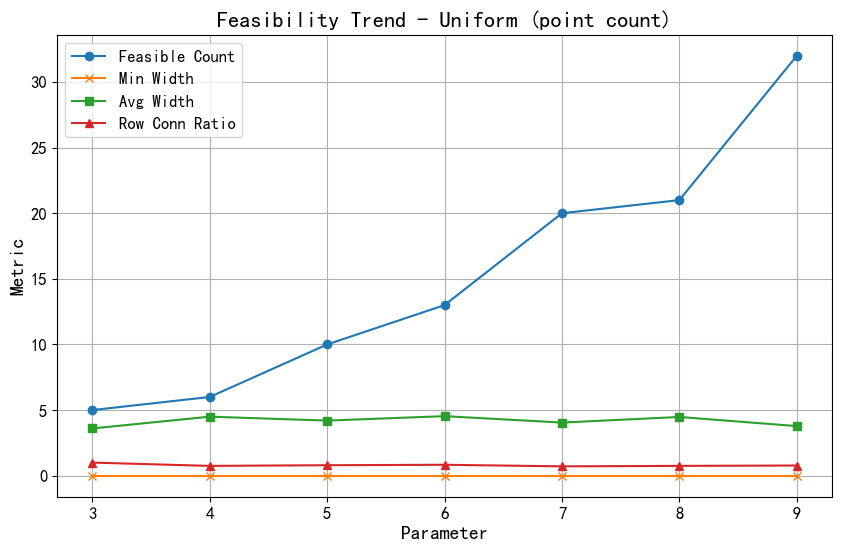

In [18]:

ns = [3, 4, 5, 6, 7, 8, 9]
results = []

for n in ns:
    values, masses = MarketGenerator.uniform(n=n, low=1, high=10)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    metrics = analyze_feasibility_matrix(values, matrix, verbose=False)
    results.append(metrics)

plot_feasibility_trend(ns, results, title="Feasibility Trend - Uniform (point count)", save_path="results/uniform_trend.svg")



▶️ 热图展示：n = 3
✅ 可行区间数量: 5
📏 最小宽度: 0.000, 平均宽度: 3.600
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 1.00

▶️ 热图展示：n = 5
✅ 可行区间数量: 10
📏 最小宽度: 0.000, 平均宽度: 4.200
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.80

▶️ 热图展示：n = 9
✅ 可行区间数量: 32
📏 最小宽度: 0.000, 平均宽度: 3.781
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.78


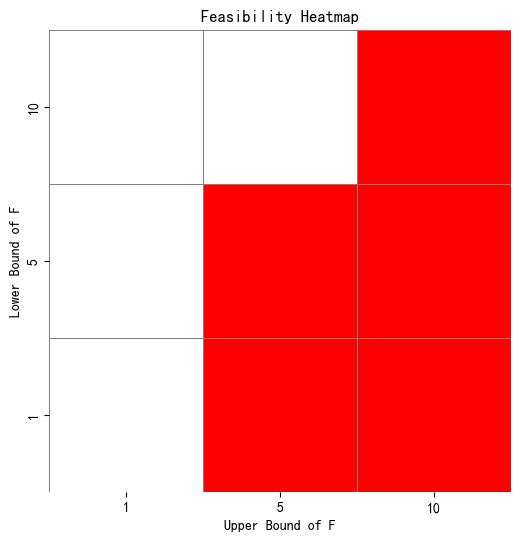

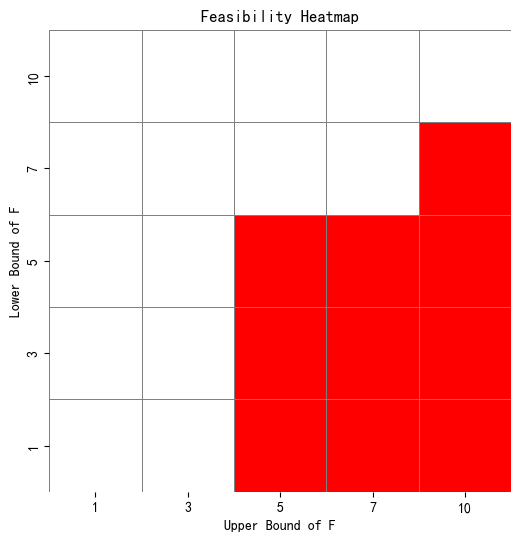

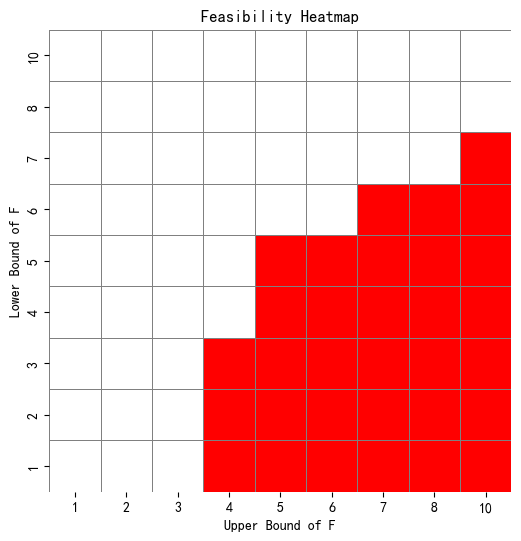

In [3]:

for n in [3, 5, 9]:
    print(f"\n▶️ 热图展示：n = {n}")
    values, masses = MarketGenerator.uniform(n=n, low=1, high=10)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    plot_feasibility_heatmap(values, matrix)
    analyze_feasibility_matrix(values, matrix)


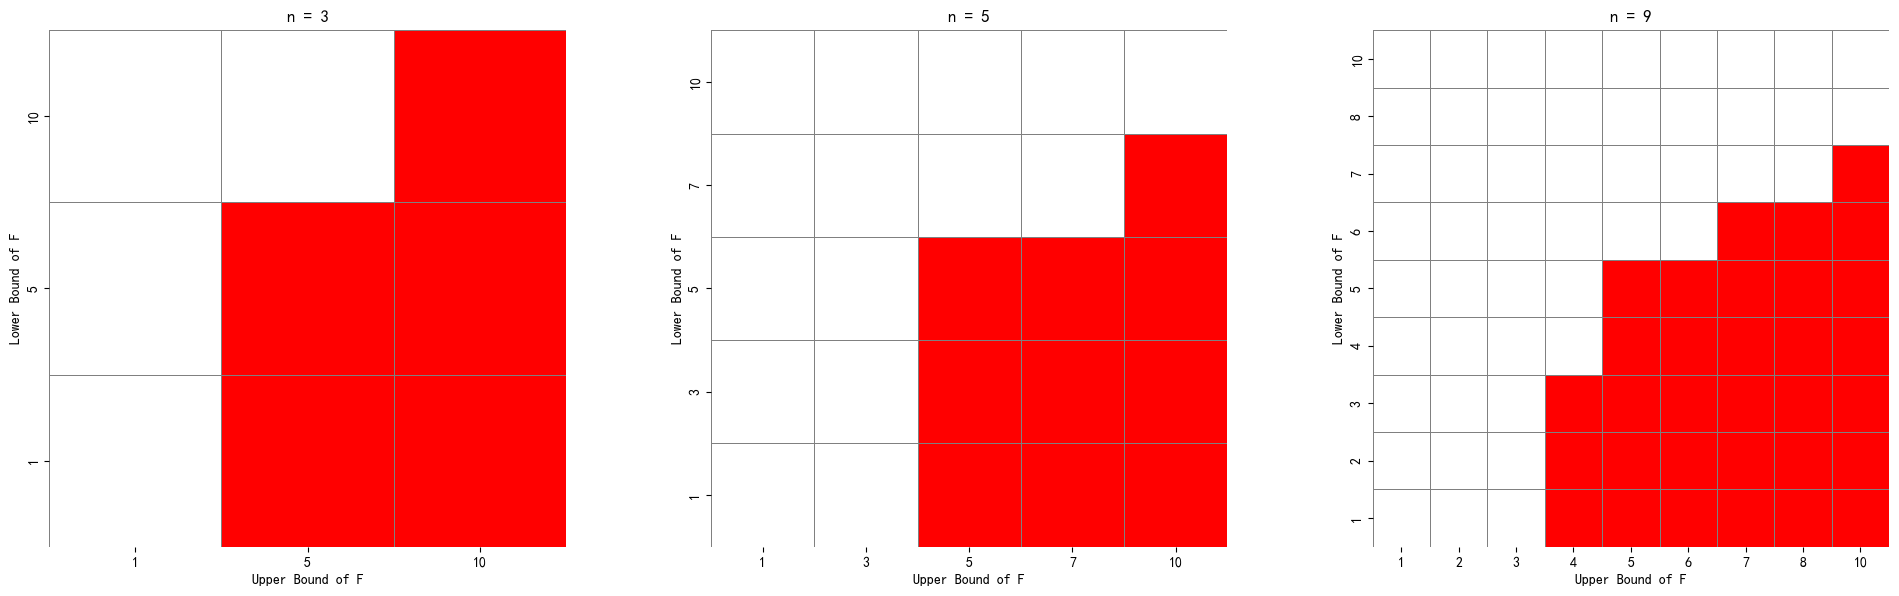

In [19]:
import matplotlib.pyplot as plt
# 创建一个含有3个子图的图形
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, n in enumerate([3, 5, 9]):
    values, masses = MarketGenerator.uniform(n=n, low=1, high=10)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    plot_feasibility_heatmap(values, matrix, title=f"n = {n}", ax=axes[i])

plt.tight_layout()
os.makedirs("results", exist_ok=True)
fig.savefig("results/uniform_heatmap.svg", bbox_inches='tight')  # 矢量图
plt.show()